<a href="https://colab.research.google.com/github/RandleRaccoon/PHYS_3025/blob/main/Numerical_Solutions_to_Laplace's_Eqaution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
n = 31                  # Number of grid points
V = np.zeros((n*10,n))      # Array to store function
a = 50                      # Set constant a
lx = n*10                   # Set length of the plate
dx = lx/(n-1)               # Find increment
x = np.linspace(0,lx,n*10)
print("dx = %.2f" % dx)

ly = n
dy = ly/(n-1)
y = np.linspace(0,ly,n)
print("dy = %.2f" % dy)

dx = 10.33
dy = 1.03


In [66]:
# #Boundary Conditions
for i in range(n*10):
    V[i,0] = 0
    V[i,n-1] = 0

for i in range(n):
    V[0,i] = y[i]
    V[n*10-1,i] = 0

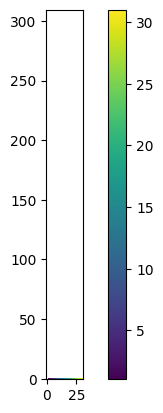

In [67]:
#Plotting Boundary Conditions
plt.imshow(np.where(V>0, V, np.nan), origin="lower")
plt.colorbar()
plt.show()

In [68]:
#Algorithm based on an article I found

resid_crit = 1.0e-6

# Arbitrary value at the begining, higher than resid_crit
resid_ave = 100.

count = 0

while resid_ave > resid_crit:

    # Set at 0 so we can sum it up later
    resid_ave = 0.

    # Set count for points in grid
    cnt_points = 0

    # Loop over internal points only
    for i in range(1,n-1):
        for j in range(1,n-1):

            # Checker-boarding
            if ((i+j)%2)==count%2:

                # Residual
                residual = (V[i+1,j] + V[i-1,j] + V[i,j+1]+ V[i,j-1])*1/4 - 4*V[i,j]

                # Update V value
                V[i,j] += 1.7*residual

                # Update resid_ave as a sum of residuals
                resid_ave += abs(residual)

                cnt_points += 1

    #  Get average residual
    resid_ave = resid_ave/cnt_points

    # Print every 1000-dth residual
    if count%1000==0:
        print("Residual: %.7f" % resid_ave)

    # Count iterations
    count = count + 1

print("\n")
print("SOR conducted a total of %g iterations to obtain approximate solution." % count)
print("Final residual: %.7f" % resid_ave)

Residual: 0.1380641


SOR conducted a total of 808 iterations to obtain approximate solution.
Final residual: nan


<ipython-input-68-1c70564c9eeb>:32: RuntimeWarning: overflow encountered in double_scalars
  resid_ave += abs(residual)
<ipython-input-68-1c70564c9eeb>:29: RuntimeWarning: overflow encountered in double_scalars
  V[i,j] += 1.7*residual
<ipython-input-68-1c70564c9eeb>:26: RuntimeWarning: overflow encountered in double_scalars
  residual = (V[i+1,j] + V[i-1,j] + V[i,j+1]+ V[i,j-1])*1/4 - 4*V[i,j]
<ipython-input-68-1c70564c9eeb>:26: RuntimeWarning: invalid value encountered in double_scalars
  residual = (V[i+1,j] + V[i-1,j] + V[i,j+1]+ V[i,j-1])*1/4 - 4*V[i,j]


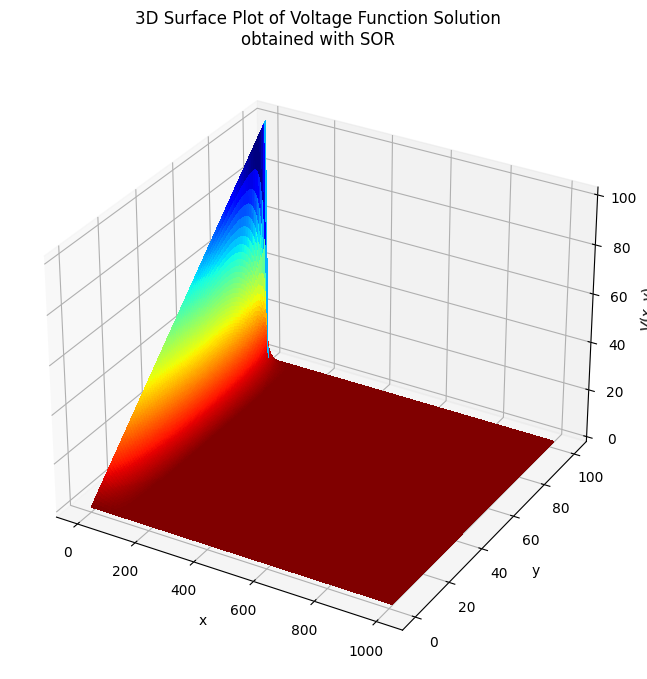

In [47]:
#Plotting
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V.T, cmap="jet_r", rstride=1, cstride=1, linewidth=0, antialiased=False)

#ax.set_xlim([0, 1])
#ax.set_ylim([0, 1])
#ax.set_zlim([0, 1])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("$V(x, y)$")
ax.set_title("3D Surface Plot of Voltage Function Solution\nobtained with SOR")
plt.show()